In [95]:
import os
import subprocess
import pandas as pd
import io
import matplotlib.pyplot as plt
import json

In [96]:
def runDbscan(dfData, n, r):
    inputText = dfData.to_csv(header=None, sep=' ', index=False)
    cmd = '../bin/b_boehm'
    result = subprocess.run(
        [ cmd, '--', f'{n}', f'{r}' ],
        input=inputText,
        stdout=subprocess.PIPE, universal_newlines=True, check=True
    )
    dct = json.loads(result.stdout)
    return pd.DataFrame(dct['output'])

nPoints = 10000
nClusters = 10
#t = pd.read_csv('../sample_data/data_10_10000.dat', sep=' ', header=None, names=['x', 'y'])
t = pd.read_csv(f'../sample_data/data_{nClusters:.0f}_{nPoints:.0f}.dat', sep=' ', header=None, names=['x', 'y'])
#t.to_csv(header=None, sep=' ', index=False)

In [97]:
# 10 clusters, 100000 data points, coreThreshold = 2000
# -> coreThreshold = min { 10000, nPoints / (nClusters * 5) }

df = runDbscan(t, min(10000, int(nPoints / (nClusters * 5))), 1.4)

In [98]:
clusters = df.groupby('cluster_id')

[]

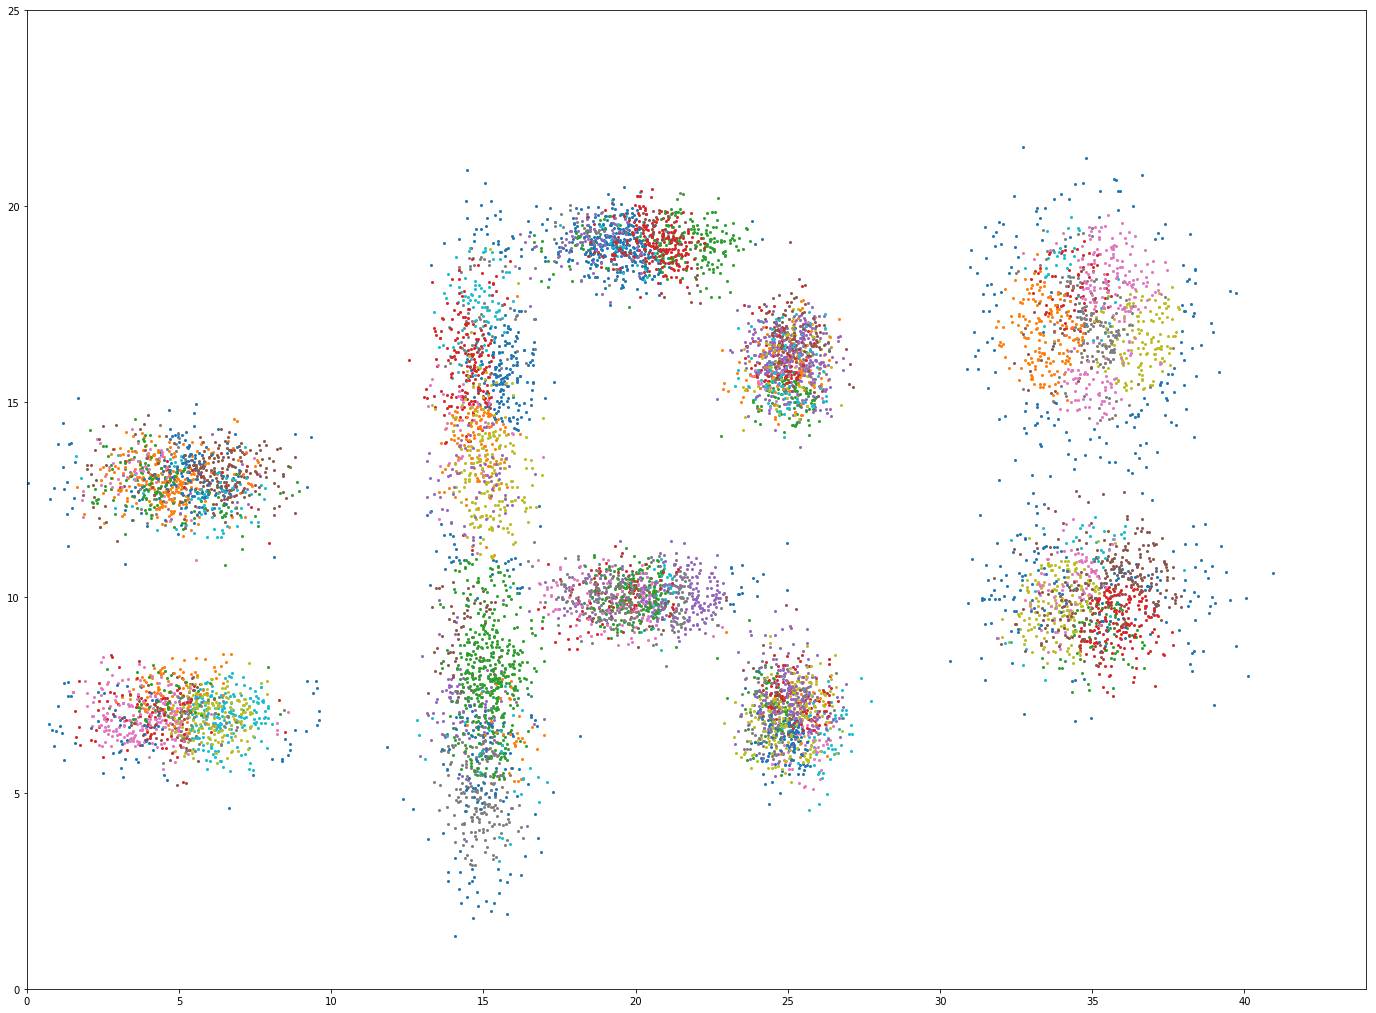

In [99]:
plt.figure(figsize=(24,18))
for clusterId, grp in clusters:
    plt.scatter(grp['x'], grp['y'], s=4)
    plt.xlim(0,44)
    plt.ylim(0,25)
plt.plot()

In [100]:
set(df['cluster_id'])

{0,
 1,
 2,
 3,
 4,
 7,
 8,
 10,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 28,
 29,
 32,
 33,
 34,
 35,
 36,
 38,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 114,
 116,
 117,
 118,
 120,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137,
 139,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 171,
 172,
 173,
 175,
 176,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 339}

In [ ]:
df